In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

In [102]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
#Displaying static image https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
df = datasets.load_iris() #also from here px.data.iris()

<b>df</b> is a .json dataset containing data about features, target, features names, target names, etc. Our task is to read data into .json format and make a dataframe of it so that it will become more readible. Print **df** data into another cell if you want to look inside it. 

In [ ]:
temp = df['data']
print(temp[:5,:])
temp = pd.DataFrame(temp)
temp.head()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
temp.columns = df['feature_names']
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
temp['target'] = df['target']
temp.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
32,5.2,4.1,1.5,0.1,0
15,5.7,4.4,1.5,0.4,0
108,6.7,2.5,5.8,1.8,2
8,4.4,2.9,1.4,0.2,0
110,6.5,3.2,5.1,2.0,2


In [ ]:
df['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
temp['target_names'] = temp['target']
temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
for i in range(3):
    temp['target_names'] = temp['target_names'].replace({i:df['target_names'][i]})
temp.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
20,5.4,3.4,1.7,0.2,0,setosa
93,5.0,2.3,3.3,1.0,1,versicolor
118,7.7,2.6,6.9,2.3,2,virginica
83,6.0,2.7,5.1,1.6,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
28,5.2,3.4,1.4,0.2,0,setosa
66,5.6,3.0,4.5,1.5,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa


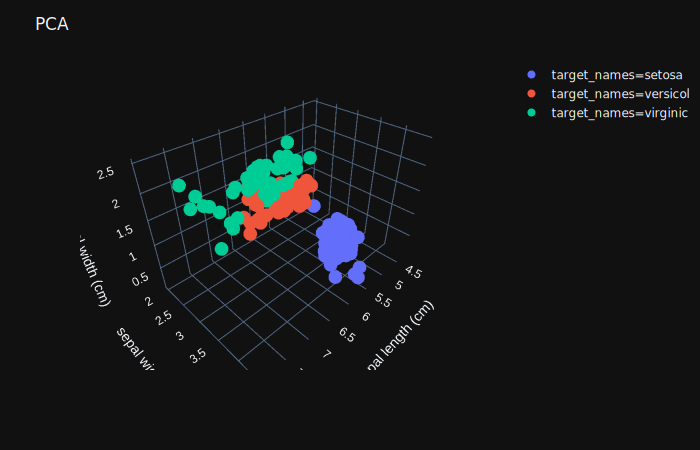

In [ ]:
fig = px.scatter_3d(temp, x='sepal length (cm)', y='sepal width (cm)', 
                    z='petal width (cm)',color='target_names')
fig.update_layout(template = 'plotly_dark',
                  title = 'PCA')
fig.show()
fig.show('svg') #only for static image

<h3>Clustering using KMeans Clustering Algo.</h3>